In [1]:
from google.colab import drive

drive.mount("./gdrive", force_remount=True)

%cd "./gdrive/My Drive/handwritten-text-recognition/src/"
!ls -l


Mounted at ./gdrive
/content/gdrive/My Drive/handwritten-text-recognition/src
total 668
-rw------- 1 root root 192449 Apr 30 15:36 after_gpt.csv
-rw------- 1 root root 226549 Apr 30 17:16 after-gpt-iam.csv
-rw------- 1 root root    186 Apr 30 20:48 after-gpt-iam.gsheet
-rw------- 1 root root  22047 May  1 00:32 after_gpt-washington.csv
drwx------ 2 root root   4096 Apr 28 07:37 data
-rw------- 1 root root 173327 May  1 07:22 iam-test.csv
drwx------ 2 root root   4096 Apr 28 07:37 language
-rw------- 1 root root  11491 Apr 27 14:48 main.py
drwx------ 2 root root   4096 Apr 28 07:37 network
-rw------- 1 root root  13576 May  1 07:34 test.csv
-rw------- 1 root root  16178 Apr 27 14:48 tutorial.ipynb
-rw------- 1 root root  13576 May  1 07:43 washington-test.csv


In [2]:
import os
import datetime
import string

# define parameters
source = "washington"
arch = "flor"
epochs = 300
batch_size = 16

# define paths
source_path = os.path.join("..", "data", f"{source}.hdf5")
output_path = os.path.join("..", "output", source, arch)
target_path = os.path.join(output_path, "checkpoint_weights.hdf5")
os.makedirs(output_path, exist_ok=True)

# define input size, number max of chars per line and list of valid chars
input_size = (1024, 128, 1)
max_text_length = 128
charset_base = string.printable[:95]

print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset_base)


source: ../data/washington.hdf5
output ../output/washington/flor
target ../output/washington/flor/checkpoint_weights.hdf5
charset: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 


In [3]:
from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print(f"Train images: {dtgen.size['train']}")
print(f"Validation images: {dtgen.size['valid']}")
print(f"Test images: {dtgen.size['test']}")


Train images: 325
Validation images: 168
Test images: 163


In [4]:
from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=arch,
                 input_size=input_size,
                 vocab_size=dtgen.tokenizer.vocab_size,
                 beam_width=10,
                 stop_tolerance=20,
                 reduce_tolerance=15,
                 reduce_factor=0.1)

model.compile(learning_rate=0.001)
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1024, 128, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 512, 64, 16)       160       
                                                                 
 p_re_lu (PReLU)             (None, 512, 64, 16)       16        
                                                                 
 batch_normalization (BatchN  (None, 512, 64, 16)      112       
 ormalization)                                                   
                                                                 
 full_gated_conv2d (FullGate  (None, 512, 64, 16)      4640      
 dConv2D)                                                        
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 64, 32)       4640  

In [5]:
#Used for training
# # to calculate total and average time per epoch
# start_time = datetime.datetime.now()

# h = model.fit(x=dtgen.next_train_batch(),
#               epochs=epochs,
#               steps_per_epoch=dtgen.steps['train'],
#               validation_data=dtgen.next_valid_batch(),
#               validation_steps=dtgen.steps['valid'],
#               callbacks=callbacks,
#               shuffle=True,
#               verbose=1)

# total_time = datetime.datetime.now() - start_time

# loss = h.history['loss']
# val_loss = h.history['val_loss']

# min_val_loss = min(val_loss)
# min_val_loss_i = val_loss.index(min_val_loss)

# time_epoch = (total_time / len(loss))
# total_item = (dtgen.size['train'] + dtgen.size['valid'])

# t_corpus = "\n".join([
#     f"Total train images:      {dtgen.size['train']}",
#     f"Total validation images: {dtgen.size['valid']}",
#     f"Batch:                   {dtgen.batch_size}\n",
#     f"Total time:              {total_time}",
#     f"Time per epoch:          {time_epoch}",
#     f"Time per item:           {time_epoch / total_item}\n",
#     f"Total epochs:            {len(loss)}",
#     f"Best epoch               {min_val_loss_i + 1}\n",
#     f"Training loss:           {loss[min_val_loss_i]:.8f}",
#     f"Validation loss:         {min_val_loss:.8f}"
# ])

# with open(os.path.join(output_path, "train.txt"), "w") as lg:
#     lg.write(t_corpus)
#     print(t_corpus)


Model Predict
11/11 [==============================] - 23s 2s/step
CTC Decode
 1/11 [=>............................] - ETA: 12s

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


11/11 [==============================] - 13s 1s/step



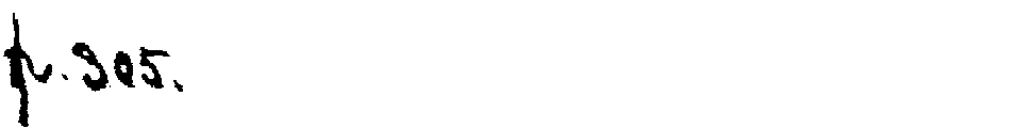

p.305
h. ger. 




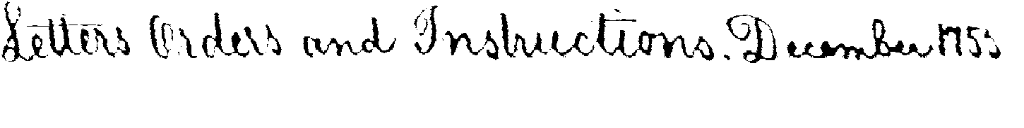

Letters Orders and Instructions. December 1755.
Letters Orders and Instructions. December 1755. 




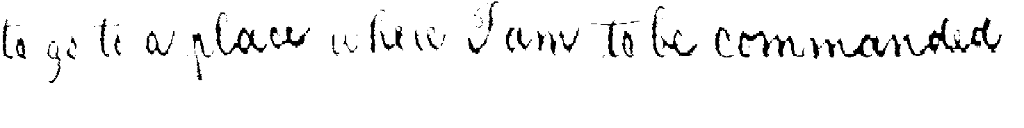

to go to a place where I am to be commanded
to go to a place where I am to be commanded 




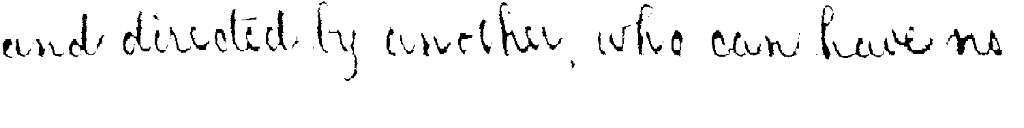

and directed by another, who can have no
and directed by andther, who can have no 




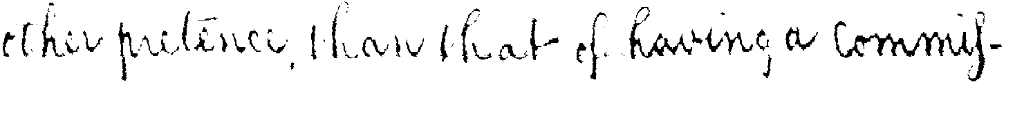

other pretence, than that of having a commis-
other pretence, than th at of having a Commis 




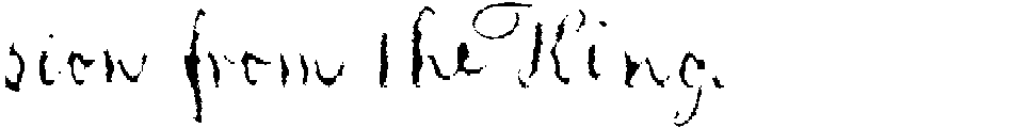

sion from the King.
sion from the Wing. 




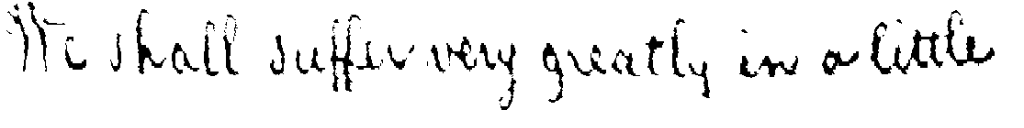

We shall suffer very greatly in a little
We shall suffer very greatly in a Little 




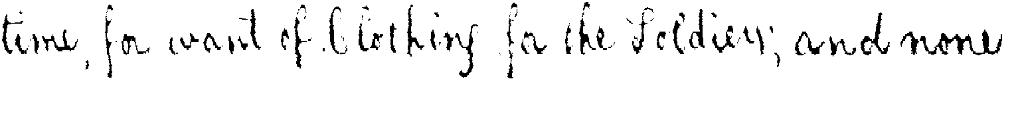

time, for want of Clothing for the Soldiers; and none
time, for want of Closhing for the Soldier; and none 




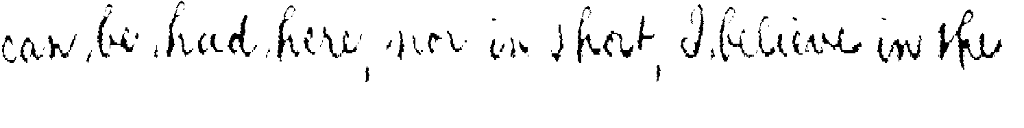

can be had here, nor in short, I believe in the
can be had here, nor in Short, S believe in the 




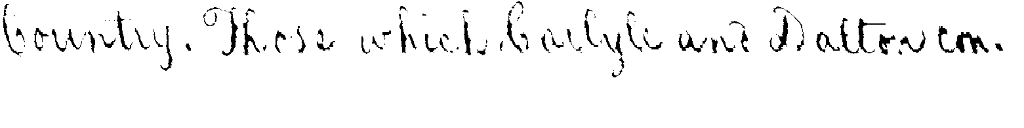

Country. Those which Carlyle and Dalton con-
Country. Those which Carlyle and Balton con- 



In [6]:
from data import preproc as pp
from google.colab.patches import cv2_imshow

start_time = datetime.datetime.now()

# predict() function will return the predicts with the probabilities
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)

# decode to string
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]
ground_truth = [x.decode() for x in dtgen.dataset['test']['gt']]

total_time = datetime.datetime.now() - start_time

# mount predict corpus file
with open(os.path.join(output_path, "predict.txt"), "w") as lg:
    for pd, gt in zip(predicts, ground_truth):
        lg.write(f"TE_L {gt}\nTE_P {pd}\n")
   
for i, item in enumerate(dtgen.dataset['test']['dt'][:10]):
    print("=" * 1024, "\n")
    cv2_imshow(pp.adjust_to_see(item))
    print(ground_truth[i])
    print(predicts[i], "\n")


In [7]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts, ground_truth, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)


Total test images:    163
Total time:           0:00:56.017331
Time per item:        0:00:00.343665

Metrics:
Character Error Rate: 0.08187933
Word Error Rate:      0.25846856
Sequence Error Rate:  0.79754601


In [8]:
import csv
with open("washington-test.csv", 'w') as csvfile: 
  csvwriter = csv.writer(csvfile) 
  csvwriter.writerow(["Ground_truth", "Prediction"]) 
  for i, item in enumerate(dtgen.dataset['test']['dt']):
    l = [ground_truth[i], predicts[i]]
    csvwriter.writerow(l)
    

In [9]:
!pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.9/709.9 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.2 MB/s eta 0:00:00


In [10]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.0 MB/s eta 0:00:00


In [11]:
from langchain import PromptTemplate, OpenAI, LLMChain
import os

OPENAI_API_KEY = input("Enter OpenAI API Key: ")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

def gpt_correction(result):
    template = """You are being fed data from a handwriting text recognition model, you are meant to make sense of the data. Keep in mind the sentences you are fed are not completely correct since the model often makes mistakes between similar looking letters based on the handwriting of the person. You are tasked with correcting any word of the sentence that does not make sense. Do not correct words that make some sense in context to the words around it.:-

    Incorrect sentence: {input}

    Correct sentence: 
    """
    prompt = PromptTemplate(template=template, input_variables=["input"])
    llm_chain = LLMChain(prompt=prompt, llm=OpenAI(temperature=0), verbose=False)

    result = llm_chain.predict(input = result)
    return result


Enter OpenAI API Key: 12345


In [12]:
#trial contains the data after GPT post-processing
import pandas as pd
df = pd.read_csv("after_gpt-washington.csv") 
df.head()

,Unnamed: 0,index,Ground_truth,Prediction,trial
0,1,1,Letters Orders and Instructions. December 1755.,Letters Orders and Instructions. December 1755.,"\nLetters, Orders, and Instructions. December ..."
1,2,2,to go to a place where I am to be commanded,to ge to a place where I am to be commanded,\nTo go to a place where I am to be commanded.
2,3,3,"and directed by another, who can have no","and directed by andther, who can have no","\nand directed by another, who can have no"
3,4,4,"other pretence, than that of having a commis-","other pretence, than that of having a Commis","\nother pretense, than that of having a Commis..."
4,5,5,sion from the King.,sion from the VFing.,\n Decision from the voting.


In [13]:
# Uncomment to re-evaluate GPT responses

# for i in range (0,162):
#   df.loc[i,"trial"]=gpt_correction(df.loc[i,"Prediction"])
# df.head()

In [14]:
#Removing \n from trial column and transfering to a list
a_list = []
for i in range(0,162):
  s = df.loc[i, "trial"]
  a = s[1:]
  a_list.append(a)
print(a_list[0:10])

['Letters, Orders, and Instructions. December 1755.', 'To go to a place where I am to be commanded.', 'and directed by another, who can have no', 'other pretense, than that of having a Commission', '    Decision from the voting.', 'e shall suffer greatly in a little while.', 'Time, for want of clothing for the soldiers; and none.', 'Can be had here, nor in short, they believe in the', 'Country. Those which Carlyle and Dalton conjoined.', '    Contracted to furnish, we are disappointed in; one']


In [16]:
print(a_list[0:9])
print(ground_truth[0:9])
print(predicts[0:9])

['Letters, Orders, and Instructions. December 1755.', 'To go to a place where I am to be commanded.', 'and directed by another, who can have no', 'other pretense, than that of having a Commission', '    Decision from the voting.', 'e shall suffer greatly in a little while.', 'Time, for want of clothing for the soldiers; and none.', 'Can be had here, nor in short, they believe in the', 'Country. Those which Carlyle and Dalton conjoined.']
['p.305', 'Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by another, who can have no', 'other pretence, than that of having a commis-', 'sion from the King.', 'We shall suffer very greatly in a little', 'time, for want of Clothing for the Soldiers; and none', 'can be had here, nor in short, I believe in the']
['h. ger.', 'Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by andther, who can have no', 'other pretence, than th at 

In [17]:
#Removing extra element
ground_truth.pop(0)
predicts.pop(0)

'h. ger.'

In [18]:
print(a_list[0:9])
print(ground_truth[0:9])
print(predicts[0:9])

['Letters, Orders, and Instructions. December 1755.', 'To go to a place where I am to be commanded.', 'and directed by another, who can have no', 'other pretense, than that of having a Commission', '    Decision from the voting.', 'e shall suffer greatly in a little while.', 'Time, for want of clothing for the soldiers; and none.', 'Can be had here, nor in short, they believe in the', 'Country. Those which Carlyle and Dalton conjoined.']
['Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by another, who can have no', 'other pretence, than that of having a commis-', 'sion from the King.', 'We shall suffer very greatly in a little', 'time, for want of Clothing for the Soldiers; and none', 'can be had here, nor in short, I believe in the', 'Country. Those which Carlyle and Dalton con-']
['Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by andther, who can have no', 

In [20]:
#Removing whitespace
copy = a_list
strip_list = []
for i in copy:
  i = i.strip()
  strip_list.append(i)
print(strip_list[0:9])


['Letters, Orders, and Instructions. December 1755.', 'To go to a place where I am to be commanded.', 'and directed by another, who can have no', 'other pretense, than that of having a Commission', 'Decision from the voting.', 'e shall suffer greatly in a little while.', 'Time, for want of clothing for the soldiers; and none.', 'Can be had here, nor in short, they believe in the', 'Country. Those which Carlyle and Dalton conjoined.']


In [26]:
#Without GPT post-processing metrics


from data import evaluation

evaluate = evaluation.ocr_metrics(predicts, ground_truth, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])
print(e_corpus)

Total test images:    163
Total time:           0:00:56.017331
Time per item:        0:00:00.343665

Metrics:
Character Error Rate: 0.07621192
Word Error Rate:      0.25389120
Sequence Error Rate:  0.79629630


In [24]:
#With GPT post-processing metrics

from data import evaluation

evaluate = evaluation.ocr_metrics(strip_list, ground_truth, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])
print(e_corpus)



Total test images:    163
Total time:           0:00:56.017331
Time per item:        0:00:00.343665

Metrics:
Character Error Rate: 0.13246714
Word Error Rate:      0.23588598
Sequence Error Rate:  0.82716049
